In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
data=pd.read_csv('sample_data/Churn_Modelling.csv')

In [59]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
## divide into ind and dep features

x=data.iloc[:,3:13]
y=data.iloc[:,13]

In [61]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [62]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [63]:
x['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [64]:
##feature engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)


In [65]:
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [66]:
geography = geography.astype(int)

In [67]:
gender=gender.astype(int)

In [68]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [69]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [70]:
#concatenate these variables to dataframe

In [71]:
x.drop(['Geography','Gender'],axis=1,inplace=True)

In [72]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [75]:
x=pd.concat([x,geography,gender],axis=1)

In [76]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [77]:
#splitting the data
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [80]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [81]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [83]:
x_train.shape

(8000, 11)

In [84]:
x_test.shape

(2000, 11)

In [85]:
#creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [86]:
##lets initialize the ANN
classifier=Sequential()


In [88]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))# activation function gets applied to next layer

In [89]:
#first hidden layer
classifier.add(Dense(units=7,activation='relu'))
#classifier.add(Dropout(0.3))

In [90]:
#second hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [92]:
#add output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [93]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])# adam uses by default lr

In [98]:
#Early stopping
import tensorflow as tf
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [99]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8749 - loss: 0.2983 - val_accuracy: 0.8470 - val_loss: 0.3728
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8720 - loss: 0.3058 - val_accuracy: 0.8508 - val_loss: 0.3754
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8742 - loss: 0.3112 - val_accuracy: 0.8501 - val_loss: 0.3764
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8772 - loss: 0.3032 - val_accuracy: 0.8493 - val_loss: 0.3819
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8684 - loss: 0.3080 - val_accuracy: 0.8478 - val_loss: 0.3741
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8643 - loss: 0.3113 - val_accuracy: 0.8470 - val_loss: 0.3763
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.3101 - val_accuracy: 0.8493 - val_loss: 0.3799
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8813 - loss: 0.2968 - 

In [101]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

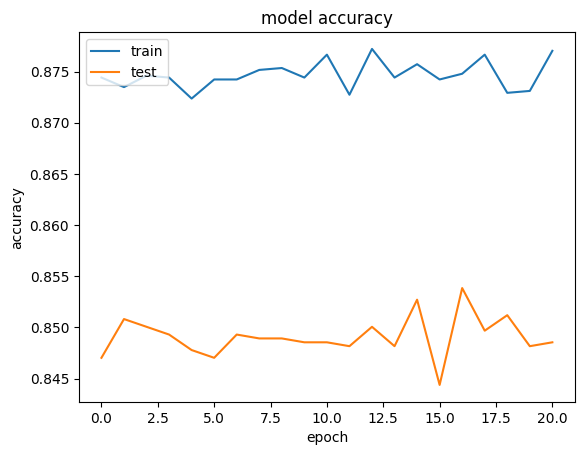

In [106]:
# prompt: plot summary for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [109]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [110]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [111]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [112]:
cm

array([[1492,  103],
       [ 188,  217]])

In [113]:
##accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [114]:
score

0.8545

In [115]:
#get the weights
classifier.get_weights()

[array([[-0.06324831,  0.12672588,  0.12018985,  0.21912906,  0.24587506,
          0.45239648,  0.0641382 , -0.0131912 ,  0.2411857 , -0.01566748,
          0.31925216],
        [-1.0813794 , -0.0579304 ,  0.15628576,  1.1534866 , -0.06916165,
          0.3720322 ,  0.13914189,  0.08448997, -0.8598533 ,  0.36065757,
          0.01176939],
        [ 0.23053408, -0.15793626,  0.1910956 , -0.1690628 ,  0.12273643,
          0.02067146,  0.19647652,  0.1867333 , -0.26265028,  0.01975887,
         -0.3385712 ],
        [-0.11371239, -0.8401737 , -0.7069652 ,  0.2707738 , -0.22555473,
          0.19984056, -0.5914353 ,  0.12939225,  0.09230392, -0.30712008,
          0.11548197],
        [-0.12442024, -0.8033235 , -0.01283514, -0.11414222,  0.9934586 ,
         -0.4631712 , -0.19526774,  0.9199474 , -0.02999567, -0.90517366,
          0.5411513 ],
        [-0.0062162 , -0.15248361, -0.396687  , -0.16645929,  0.36684787,
         -0.10552803, -0.13918711, -0.09426812, -0.17716901, -0.1444616